<a href="https://colab.research.google.com/github/aycaerbasi/flower/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving spotify_data.csv to spotify_data (4).csv


In [24]:
import pandas as pd 
import io 
import numpy as np
  
df = pd.read_csv(io.BytesIO(uploaded['spotify_data.csv'])) 
df = df.drop("Unnamed: 0", axis="columns")
df.head()



,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist;
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,150.062,4.0,0.286,1.0,Mask Off,Future;
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,160.083,4.0,0.588,1.0,Redbone,Childish Gambino;
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,75.044,4.0,0.173,1.0,Xanny Family,Future;
3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,86.468,4.0,0.230,1.0,Master Of None,Beach House;
4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,174.004,4.0,0.904,1.0,Parallel Lines,Junior Boys;


In [25]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline


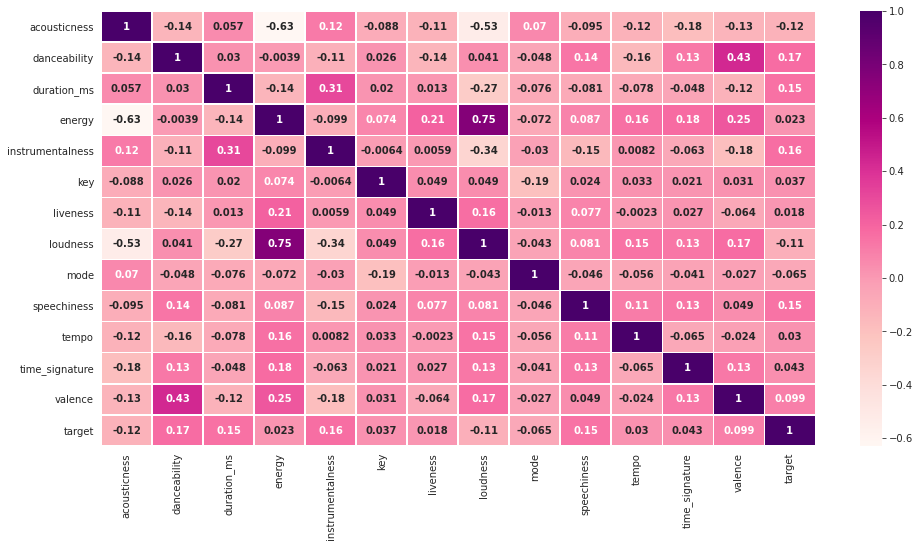

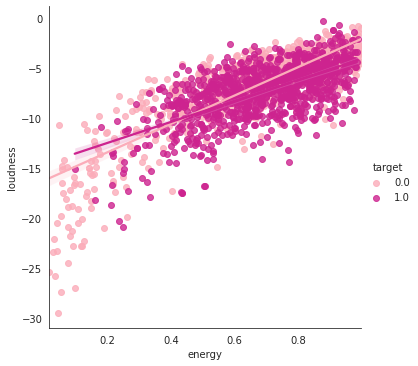

In [26]:
corr = df.corr()
fig1 = plot.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, annot_kws={'weight':'bold'},linewidths=.5, cmap='RdPu')

sns.lmplot(y='loudness',x='energy',data=df, hue='target',palette='RdPu')


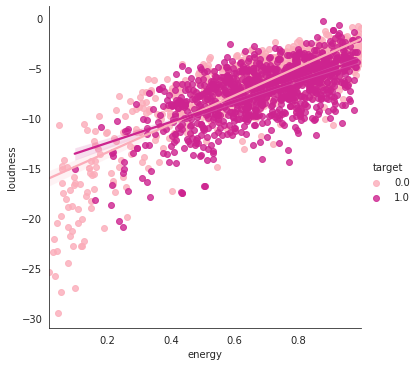

In [27]:
sns.lmplot(y='loudness',x='energy',data=df, hue='target',palette='RdPu')

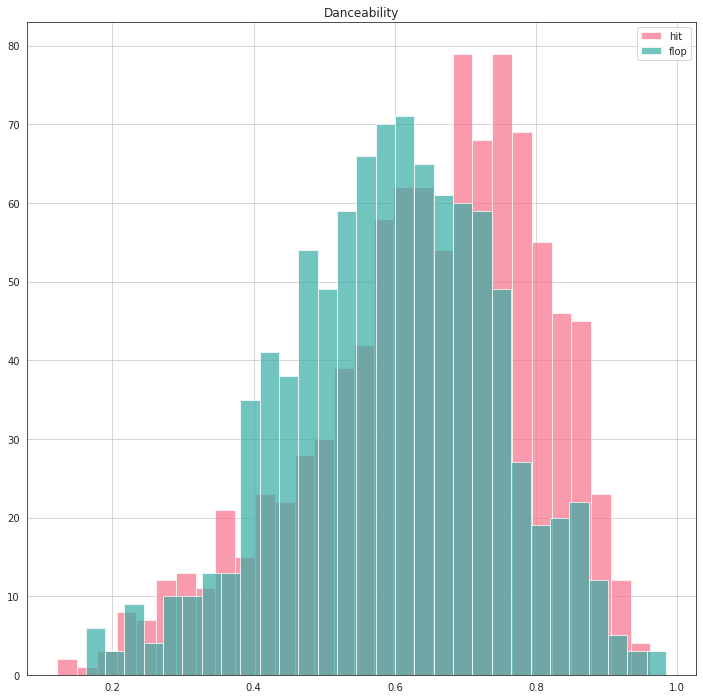

In [28]:
hit_danceability = df[df['target']==1]['danceability']
flop_danceability = df[df['target']==0]['danceability']

palette = sns.color_palette("husl", 2)
fig = plot.figure(figsize=(12,12))
plot.title("Danceability")

hit_danceability.hist(alpha = 0.7, bins = 30, label = 'hit')
flop_danceability.hist(alpha = 0.7, bins = 30, label = 'flop')
plot.legend()

In [37]:
df.sort_values('instrumentalness', axis = 0, ascending = False).head(10)[["instrumentalness","song_title","artist;",]]

,instrumentalness,song_title,artist;
1313,0.976,Senseless Order,Signs of the Swarm;
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama;
1575,0.964,A Hundred Dreams from Now,Ray Bryant;
1619,0.958,Raven,John Dahlbäck;
725,0.957,Strandbar (disko),Todd Terje;
1546,0.956,Almas vaggvisa,Jan Lundgren Trio;
1322,0.955,Pitchblack,Walking Dead On Broadway;
1661,0.954,Yebisah,Mark Knight;
1349,0.954,Prismatic Abyss,Aversions Crown;
121,0.952,Chasing Heaven,Bassnectar;


In [51]:
from collections import Counter
c = Counter(df['artist;'])
c.most_common(10)

[(nan, 68),
 ('Drake;', 14),
 ('Rick Ross;', 13),
 ('Disclosure;', 12),
 ('Backstreet Boys;', 10),
 ('WALK THE MOON;', 10),
 ('Crystal Castles;', 9),
 ('FIDLAR;', 9),
 ('Future;', 8),
 ('Kanye West;', 8)]

In [53]:
df[(df['artist;'] == "Drake;")].sort_values('energy', axis = 0, ascending=False)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist;
1218,0.21900,0.427,257760.0,0.861,0.000000,1.0,0.2770,-4.874,1.0,0.3760,161.776,4.0,0.581,0.0,Best I Ever Had,Drake;
1016,0.01030,0.745,143214.0,0.822,0.000004,7.0,0.1550,-6.354,1.0,0.2520,86.733,5.0,0.374,1.0,Skepta Interlude,Drake;
779,0.76300,0.707,275227.0,0.709,0.000000,11.0,0.2740,-3.979,0.0,0.3400,89.094,4.0,0.497,1.0,0 To 100 / The Catch Up,Drake;
154,0.00157,0.790,217707.0,0.676,0.000000,8.0,0.2500,-6.432,0.0,0.2710,132.002,4.0,0.314,1.0,Big Rings,Drake;
117,0.00257,0.896,267024.0,0.623,0.000258,2.0,0.0390,-8.008,1.0,0.0571,134.962,4.0,0.564,1.0,Hotline Bling,Drake;
440,0.36900,0.662,236733.0,0.571,0.000197,6.0,0.0908,-7.382,0.0,0.1060,152.009,4.0,0.442,1.0,Headlines,Drake;
5,0.00479,0.804,251333.0,0.560,0.000000,8.0,0.1640,-6.682,1.0,0.1850,85.023,4.0,0.264,1.0,Sneakin’,Drake;
37,0.05650,0.853,205879.0,0.547,0.000000,1.0,0.3410,-7.535,1.0,0.1940,142.065,4.0,0.677,1.0,Jumpman,Drake;
589,0.04250,0.790,173160.0,0.531,0.000000,8.0,0.2660,-6.968,1.0,0.1970,86.306,4.0,0.498,1.0,Started From the Bottom,Drake;
1223,0.04310,0.697,277387.0,0.527,0.000013,0.0,0.0882,-10.438,0.0,0.2110,121.849,4.0,0.289,0.0,Take Care,Drake;
